<a href="https://colab.research.google.com/github/AnnSenina/Python_CL_2023/blob/main/notebooks/Python_11_n_gramms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Препроцессим с NLTK

In [155]:
#!pip install nltk
!pip install wordcloud
!pip install ruword-frequency
!pip install scikit-learn

In [ ]:
# все то, что надо импортировать

import nltk

from nltk.tokenize import word_tokenize, wordpunct_tokenize

from nltk import download
download('punkt')

download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

from nltk import Text as nltk_text

# облако слов
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from ruword_frequency import Frequency

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
add_stop = []
with open('stop_ru.txt', 'r', encoding='utf-8') as f:
  for i in f:
    add_stop.append(i.strip())
print(add_stop)

In [ ]:
stop_words = stop_words + add_stop
stop_words = list(set(stop_words))
print(stop_words)

In [54]:
def clean_text(text_str, stop_words):
  text_str = text_str.lower() # нижний регистр
  text_list_nltk = word_tokenize(text_str) # токенизация
  # чистим от стоп-слов и пунктуации
  text_clean = [word for word in text_list_nltk if word not in stop_words and word[0].isalpha()]
  text_stemmed = [stemmer.stem(word) for word in text_clean] # стемминг
  return text_stemmed

In [ ]:
# подгрузим файл

with open('udhr_rus.txt', 'r', encoding='utf-8') as f:
  text = f.read()

print(text[:100])

In [ ]:
full_text = clean_text(text, stop_words)
print(full_text[:100])

# Готово! Вернемся к частотам

In [ ]:
from collections import Counter
Counter(full_text).most_common(50)
#print(Counter(full_text).most_common(50))

Вспомним, что не так с нашими частотами?

##Облако слов

In [ ]:
# Импортируем инструменты для облака слов и списки стоп-слов
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# %matplotlib inline

# Генерируем облако слов
wordcloud = WordCloud().generate(', '.join(full_text))
plt.imshow(wordcloud) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

In [ ]:
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      background_color='black',
                      colormap='Pastel1').generate(', '.join(full_text))
plt.figure(figsize=(40, 30)) # Устанавливаем размер картинки
plt.imshow(wordcloud) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

In [ ]:
# еще один способ визуализации частот встроен в NLTK
# from nltk import Text as nltk_text
nltk_format = nltk_text(full_text)
nltk_format.dispersion_plot(["прав", "человек", "свобод", "брак", "отдых", "мужчин", "женщин"]);

Для лемматизированного текст выглядело бы так:


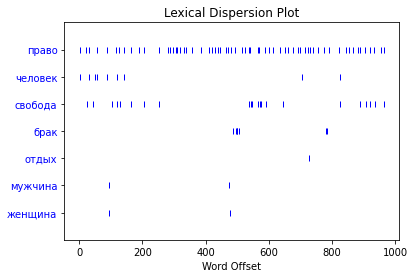

### Задание

Предобработайте текст

In [ ]:
cloud = '''В любой непонятной ситуации дата-сайентист визуализирует данные: это, среди прочего, облегчает поиск инсайтов и формулирование гипотез для проверки.
Облако слов — визуализация текстовых данных на стыке исследовательского анализа, инфографики и дата-дизайна. Это самый первый и быстрый взгляд на большие и слабо структурированные тексты: художественные, научные, информационные.
Главные причины использовать облако слов:
Во-первых, это красиво — удачная визуализация украшает портфолио.
Во-вторых, облако показывает самые популярные слова текста, что полезно для быстрой его оценки.
Например, для школьного сочинения или текста в разговорном стиле это могут оказаться слова-паразиты (от таких неплохо бы избавляться), а для научных или «инфостильных» текстов — слова, больше относящиеся к содержанию.
В-третьих, сделать такую визуализацию совсем не сложно — и сейчас вы сами в этом убедитесь.
Мы будем работать в блокноте Google Colab — то есть прямо в браузере, код напишем на языке Python, а текст возьмём из «Википедии». Если что-то пойдёт не так — всегда можно свериться с нашим блокнотом: все ссылки есть в конце статьи.'''

# текст отсюда https://skillbox.ru/media/code/vizualiziruy-eto-oblako-slov-na-python/

In [ ]:
# ваш код


###Задание 2

Создайте облако слов

In [ ]:
# ваш код


##N-gramms
Текст можно разделить на n-граммы – устойчивые сочетания по N слов:

    nltk.bigrams() – сочетания по два слова
    nltk.trigrams() – сочетания по три слова
    nltk.ngrams(list, n) – сочетания по N слов

In [ ]:
# import nltk

freq_trigramms = Counter(nltk.bigrams(full_text))
freq_trigramms.most_common(20)

In [ ]:
freq_trigramms = Counter(nltk.trigrams(full_text))
freq_trigramms.most_common(10)

In [ ]:
freq_trigramms = Counter(nltk.ngrams(full_text, 4))
freq_trigramms.most_common(20)

###Частотный анализ

Многие компьтерные методы анализа текста основаны на статистике — в нашем случае это частотность символов / словоформ / лексем / биграмм / триграмм / частей речи и т.д., ее отношение к длине текста, средняя длина текстов и т.д.

Зачем нам знать частотность слов в тексте? Например, она говорит о том, какие слова наиболее характеры для того или иного текста. Сравнивая частотные слова в разных текстах можно определить степень их близости, классифицировать по жанру, теме и т.п., а также выявить явления, характерные для языка в целом.



### Закон Ципфа

**Закон Ципфа** («ранг—частота») — эмпирическая закономерность распределения частоты слов естественного языка: если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n (т.н. рангу этого слова). Например, второе по используемости слово встречается примерно в два раза реже, чем первое, третье — в три раза реже, чем первое, и т.д.

**Если закон Ципфа соблюдается — значит, перед нами нормальный текст на естественном языке. Если нет, то что-то с ним не так.**

### Закон Хипса

**Закон Хипса** — эмпирическая закономерность в лингвистике, описывающая распределение числа уникальных слов в документе (или наборе документов) как функцию от его длины.

**Чем больше коллекция текстов, тем меньше новых токенов появляется с её пополнением**

##Способы считать частоту

### Абсолютная частота слова
Количество употреблений слова в тексте. Она не всегда уместна.


### Относительная частота слова
это отношение его абсолютной частоты к какой-нибудь другой величине, например, к длине текста или корпуса. Существуют разные способы подсчета относительной частоты.

### IPM
Для сравнения частот в разных коллекциях текстов популярен $ipm$ *(items per million)* - отношение абсолютной частоты какого-либо элемента к объему корпуса, умноженное на миллион.

$$ ipm_{word} = \dfrac{f_{word}}V_{corpus} \        \times \  1,000,000 $$

Например, если текст состоит из 500 слов, и слово "котик" встречается там 50 раз, то

$$ ipm_{котик} = \dfrac{50}{500} \       \times \  1,000,000 \     = 100,000 $$

Метрика IPM позволяет сравнивать тексты через их характеристики. Например, "Я" заметно чаще встречается в корпусе любительской литературы, чем в корпусе художественных произведений из НКРЯ.

Кстати, есть библиотеки с подсчетом ipm
* [разные языки](https://pypi.org/project/wordfreq/)
* отдельно [русский язык](https://pypi.org/project/ruword-frequency/)


In [ ]:
# !pip install ruword-frequency

In [ ]:
# как часто слово "право" встречается в корпусе русского языка?
# from ruword_frequency import Frequency
freq = Frequency()
freq.load()

ipm = freq.ipm('право')
print(ipm)

In [ ]:
# а как часто - в нашем тексте?
print(full_text.count("прав") / len(full_text) * 1000000)

### TF-IDF

Tf-Idf - способ высоко оценить слова, которые одновременно
* показательны в документе
* не вездесущи в корпусе документов


Наивная идея такая: давайте оценка слова будет
* увеличиваться, если оно частотно в документе
* уменьшаться, если оно встречается во многих документах

В таком противостоянии победят те слова, которые выделяют документы из многих им подобных.




###Пример с использованием sklearn

[Гайд](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) из библиотеки sklearn

In [140]:
# from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

In [141]:
corpus = ['Three Rings for the Elven-kings under the sky',
          'Seven for the Dwarf-lords in their halls of stone',
          'Nine for Mortal Men doomed to die',
          'One for the Dark Lord on his dark throne',
          'In the Land of Mordor where the Shadows lie',
          'One Ring to rule them all',
          'One Ring to find them',
          'One Ring to bring them all and in the darkness bind them',
          'In the Land of Mordor where the Shadows lie']

In [ ]:
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf.shape
# предположите, что означают эти числа?

In [ ]:
print(tfidf)

In [ ]:
print(tfidf.todense())

In [ ]:
tfidf_vectorizer.vocabulary_ # словарь - не частотный!
#print(tfidf_vectorizer.vocabulary_)

In [ ]:
words = tfidf_vectorizer.get_feature_names_out()
words
#print(words)

In [ ]:
data = tfidf.todense().tolist()
lotr = pd.DataFrame(data, columns = words)
lotr
#print(lotr)

In [ ]:
sorted(zip(tfidf.toarray()[0], words), reverse=True)
# print(sorted(zip(tfidf.toarray()[0], words), reverse=True))

Еще посмотреть: [пример](https://www.kaggle.com/code/rowhitswami/keywords-extraction-using-tf-idf-method) по материалам конференции NIPS